# @Holger Elias Rivera Espinola
# PROGRAMA DE RECONHECIMENTO DE PADRÕES
# CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA
-----------------------------------------------------------------------------------------------

# PROBLEMA 01: CLASSIFICAÇÃO LINEAR - BRACA1 VS OUTROS

Os dados são provenientes do dataset data_breast_cancer.csv, contendo 3226 variáveis (genes) e 22 amostras (pacientes), das quais 7 amostras são da classe BRACA1, 8 da classe BRACA2 e 7 da classe SPORADIC

1) Carregar os dados do arquivo .csv e lê-os em um dataset.

In [1]:
from csv import reader
#carregamento de dados do arquivo csv
def load_csv(filename):
    file=open(filename,"r")
    lines=reader(file)
    dataset=list(lines)
    return dataset
#executar arquivo de leitura csv
filename='data_breast_cancer.csv'
dataset=load_csv(filename)
print('Dados carregados arquivo {0} com #filas: {1} e #colunas: {2}'.format(filename,len(dataset),len(dataset[0])))

Dados carregados arquivo data_breast_cancer.csv com #filas: 3228 e #colunas: 23


2)	Criar um dataset para o problema 1 que tenha a seguinte forma:

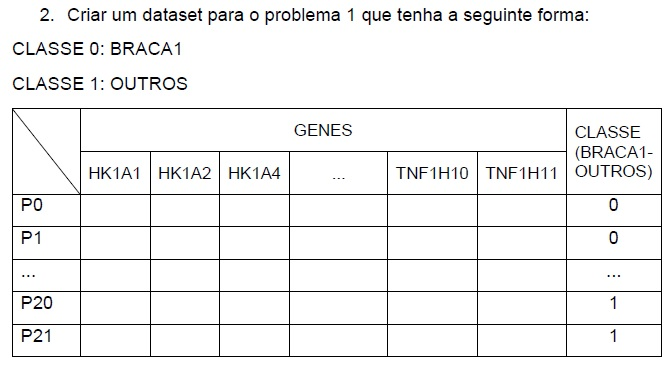

In [2]:
from IPython.display import Image
Image('Untitled Folder/t2.jpg')

In [3]:
#dados para o problema 1
datasetp1=[]
j1=0
for j in range(1,len(dataset[0])):
    if dataset[-1][j]=='BRACA1': #dados de braca1
        datasetp1.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp1[j1][-1]=0
        j1=j1+1
    else: #dados de outros
        datasetp1.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp1[j1][-1]=1
        j1=j1+1

#vista dos dados do problema 1
#print(datasetp1)

3) Criar uma lista que tenha os dados para uma variável gene com 2 sublistas uma para a classe 0 (braca1) 
   e outra para a classe 1(outros).

In [3]:
#criacao do x1 (braca1) e x2 (outros)
def braca1_outros(gene):
    lbraca=[]
    braca1=[]
    outros=[]
    ib1=0
    ib2=0
    for i in range(len(datasetp1)):
        if datasetp1[i][-1]==0:  #carateristica pertence a braca1
            braca1.insert(ib1,float(datasetp1[i][gene]))
            ib1=ib1+1
        else: #carateristica pertence a outros
            outros.insert(ib2,float(datasetp1[i][gene]))
            ib2=ib2+1
    lbraca.insert(0,braca1)
    lbraca.insert(1,outros)
    return lbraca

#exemplo: para gene 0 e 1
print(braca1_outros(0))
print(braca1_outros(1))

[[0.15, 0.22, 0.3, 0.26, 1.22, 0.44, 0.38], [0.35, 1.1, 1.07, 1.46, 0.36, 0.57, 0.31, 0.48, 0.4, 0.25, 0.44, 0.7273, 0.6338, 0.7677, 0.6594]]
[[1.54, 1.27, 0.76, 0.85, 1.27, 0.64, 0.61], [0.9, 0.64, 0.78, 0.55, 1.02, 0.39, 1.39, 0.83, 1.02, 0.61, 1.53, 0.7056, 0.2994, 0.6221, 0.9987]]


4) Criando os vetores Sn por cada combinação de pares de genes:

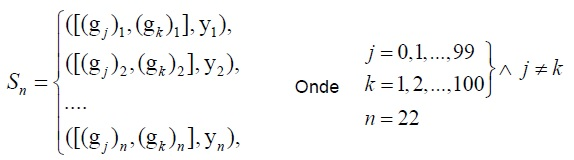

In [4]:
Image('Untitled Folder/tx2.jpg')

In [4]:
#criacao do sn={[(gene_a)i,(gene_b)i],yi}
def criar_sn(genea,geneb):
    sn=[]
    x=[]
    y=[]
    x=braca1_outros(genea)
    y=braca1_outros(geneb)
    for i in range(0,len(x[0])):
        sn.insert(i,[x[0][i],y[0][i],0])
    for i in range(0,len(x[1])):
        sn.insert((len(x[0]))+i,[x[1][i],y[1][i],1])
    return sn

#exemplo: criar um sn para genes 0 e 1
print(criar_sn(0,1))

[[0.15, 1.54, 0], [0.22, 1.27, 0], [0.3, 0.76, 0], [0.26, 0.85, 0], [1.22, 1.27, 0], [0.44, 0.64, 0], [0.38, 0.61, 0], [0.35, 0.9, 1], [1.1, 0.64, 1], [1.07, 0.78, 1], [1.46, 0.55, 1], [0.36, 1.02, 1], [0.57, 0.39, 1], [0.31, 1.39, 1], [0.48, 0.83, 1], [0.4, 1.02, 1], [0.25, 0.61, 1], [0.44, 1.53, 1], [0.7273, 0.7056, 1], [0.6338, 0.2994, 1], [0.7677, 0.6221, 1], [0.6594, 0.9987, 1]]


5) Função Linear

Dada para uma função linear o vetor de coeficientes $w=(b,w_1,w_2)$ e o vetor de pontos $x=(x_1,x_2)$, o valor da função linear se obtém pela equação: 
$$f(w,x)=b+w_1\cdot x_1+w_2\cdot x_2 $$

In [5]:
#funcao linear: f(w,x)=b+w1*x1+w2*x2
def linear(coef,ponto):
    soma=coef[0]
    for i in range(len(ponto)):
        soma=soma+coef[i]*ponto[i]
    return soma

6) Função Sigmoide: 

Função básica que devolve valores entre 0 e 1, assegurando que os valores obtidos representam de fato uma probabilidade.
$$s(z) = \frac{1}{1 + e^{-z}}$$


In [6]:
#funcao sigmoide: s(z)=1/(1+exp(-z))
def sigmoide(z):
    from math import exp
    from math import fabs
    if fabs(z)>0 and fabs(z)<1e-3:
        z=z/fabs(z)*1e-3
    if fabs(z)>100:
        z=z/fabs(z)*100
    return 1.0/(1+exp(-z))

7)	Função Probabilidade

Dado os coeficientes de um classificador linear e um ponto, calculamos a probabilidade de ocorrência dos pontos:
$$h([b,w_1,w_2],[x_1,x_2])=\frac{1}{1 + e^{-(b+w_1\cdot x_1+w_2\cdot x_2)}}$$

In [7]:
#funcao probabilidade: h([b,w1,w2],[x1,x2])=1/(1+exp(-(b+w1*x1+w2*x2)))
def probabilidade(coef,ponto):
    z=linear(coef,ponto)
    return sigmoide(z)

8) Função ganho

Dado um conjunto de treinamento $S_n=\{(x_1,y_1),\ldots,(x_n,y_n)\}$ e os coeficientes de uma função linear  $w=(b,w_1,w_2)$,
a função ganho está definida como a função likelihood:

$$J([b,w_1,w_2],S_n)=\sum_{i=1}^{n}y_{i}log(h([b,w_1,w_2],[x_1,x_2]_{i})) + (1-y_{i})log(1-h([b,w_1,w_2],[x_1,x_2]_{i}))$$

In [8]:
#funcao ganho: J([b,w1,w2],Sn)=sum( (yi*log(h([b,w1,w2],[x1,x2]))) + ((1-yi)*log(1-h([b,w1,w2],[x1,x2]))) ), i=i...n
def ganho(coef,sn):
    from math import log
    soma=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        p=probabilidade(coef,ponto)
        if p<1e-20:
            p=1e-20
        if (1-p)<1e-10:
            p=1-(1e-10)
        soma=soma+(classe*log(p))+((1-classe)*log(1-p))
    return soma

9) Gradiente descendente

A gradiente para $J([b,w_1,w_2],S_n)$ é o vetor:
$$\nabla J=\left(\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}, \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1},  \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_1]_{i}$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_2]_{i}$$

 A gradiente descendente se obtêm com o seguinte método:

 1. Obter o primeiro classificador linear  $(b,w_1,w_2)_0$ de forma aleatoria.
 2. Computar $\Delta b= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial b}$
 3. Computar $\Delta w_1= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_1}$
 4. Computar $\Delta w_2= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_2}$
 5. Atualizar $(b,w_1,w_2)_1 = (b,w_1,w_2)_0+ \gamma(\Delta b, \Delta w_1, \Delta w_2)$
 6. O $(b,w_1,w_2)_0$ se converte em $(b,w_1,w_2)_1$
 7. Repetir o processo 2 ao 6 até convergir


In [9]:
#funcao gradiente descendente
def gradiente(coef,sn):
    learning_rate=[10000,1000,100,10,5,3,2,1,0.5,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001,3e-5,1e-5]
    current_value=ganho(coef,sn)
    delta_b=0
    delta_w1=0
    delta_w2=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        prob=probabilidade(coef,ponto)
        delta_b=delta_b+(classe-prob)
        delta_w1=delta_w1+(classe-prob)*ponto[1]
        delta_w2=delta_w2+(classe-prob)*ponto[2]
    real_rate=0
    for rate in learning_rate:
        after_value=ganho([(coef[0]+rate*delta_b),(coef[1]+rate*delta_w1),(coef[2]+rate*delta_w2)],sn)
        if after_value>current_value:
            real_rate=rate
            break;
    coef[0]=coef[0]+rate*delta_b
    coef[1]=coef[1]+rate*delta_w1
    coef[2]=coef[2]+rate*delta_w2
    return coef


10)	Obtenção dos coeficientes com o menor ganho possível

In [42]:
#funcao para obter os coeficientes otimizados [b*,w*]
def gradiente_learning(coef,sn):
    precisao=0
    current_value=ganho(coef,sn)
    coef=gradiente(coef,sn)
    after_value=ganho(coef,sn)
    while current_value<after_value and precisao<50:
        current_value=after_value
        coef=gradiente(coef,sn)
        after_value=ganho(coef,sn)
        precisao=precisao+1
    return coef

#exemplo: obter os coef otimizados para genes 0 e 1
coefx=[1,1,1]
snx=criar_sn(0,1)
coefx=gradiente_learning(coefx,snx)
print(coefx)
print(ganho(coefx,snx))

[0.6173387550692694, 1.9528249702933371, -0.9650335721400745]
-12.47837182062511


11)	Lista de ganhos por cada combinação de genes.

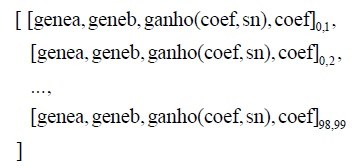

In [5]:
Image('Untitled Folder/tx6.jpg')

In [43]:
#funcao para criar lista de ganhos
def lista_ganhos(datasetp1):
    k=0
    lganhos=[]
    
    for i in range(0,99): 
        for j in range(i+1,100):
            coef=[1,1,1]
            sn=[]
            sn=criar_sn(i,j)
            coef=gradiente_learning(coef,sn)
            lganhos.insert(k,[i,j,round(ganho(coef,sn),4),coef])
            k=k+1
    return lganhos

#verificando a lista de ganhos para todas as combinacoes dos 
#100 primeiros pares de genes
lg=[]
lg=lista_ganhos(datasetp1)
print(lg)

[[0, 1, -12.4784, [0.6173387550692694, 1.9528249702933371, -0.9650335721400745]], [0, 2, -12.4078, [0.6717300895989857, 2.2256986259147125, -0.6698745453723421]], [0, 3, -12.5549, [-0.79058150711177, 1.6972692854290048, 0.4379132428804067]], [0, 4, -12.6463, [-0.04505682512592175, 2.31762903148055, -0.29519533500658673]], [0, 5, -11.2605, [2.9358042975971204, 2.3782271971502307, -3.2791958379994655]], [0, 6, -12.6259, [-1.0568791778587316, 2.3214225560271786, 0.6320353832020527]], [0, 7, -11.7379, [1.2712787847154636, 1.9203220307580813, -3.277072494009267]], [0, 8, -12.605, [-0.9388942862566837, 2.4081144319441745, 0.376626641105196]], [0, 9, -5.5145, [6.3976533296513365, 0.3763902291319523, -8.143611283499501]], [0, 10, -12.6336, [-0.7498934236468288, 2.227515079545187, 0.41251958429123553]], [0, 11, -11.3739, [2.2304603675174524, 1.4758503131630631, -3.037025996662072]], [0, 12, -11.7824, [1.7333681344752623, 2.059125731358465, -1.281868010108404]], [0, 13, -12.5793, [-1.15978356180

12)	Escolher os 10 melhores ganhos e identificar os genes dos quais pertencem

In [44]:
#funcao para ordenar e escolher top10
def select_top10(lganhos):
    top10=[]
    lganhos.sort(reverse=True,key=lambda x:x[2])
    for i in range(0,10):
        top10.insert(i,lganhos[i])
    return top10

#obtendo a lista dos 10 melhores
best10x=[]
best10x=select_top10(lg)
print(best10x)

[[9, 58, -0.0701, [67.30875318810872, -212.4154980577518, 99.64315646486605]], [2, 9, -3.2046, [12.94267663070628, -2.9747638058364263, -10.500890422359731]], [9, 17, -3.4513, [3.309113421116564, -12.35296782574711, 5.038304533071926]], [9, 79, -3.7165, [6.592235285477237, -18.809222412132183, 12.423074725027538]], [9, 38, -3.7249, [8.966913590674345, -7.892841199606351, -2.393706315532752]], [9, 77, -3.7429, [12.478268180169845, -11.451544301324851, -2.213658412017471]], [9, 61, -3.7593, [15.53282775553431, -14.565531896162126, -3.8602641686996217]], [1, 9, -3.7814, [15.234716468720812, -3.576264644861752, -15.17995366572589]], [9, 47, -3.9042, [3.8166663021868685, -12.184179318101991, 7.061299409477881]], [9, 48, -4.0901, [7.981195259926689, -18.379612497141093, 8.233348262053031]]]


13)	Criar reta a partir dos coeficientes otimizados na equação

In [48]:
#funcao para criar uma reta
def gerar_reta(coef,sn):
    r=[]
    x=[i for i in range(0,4)]
    y=[-(coef[0]/coef[2])-(coef[1]/coef[2])*a for a in x]
    r.insert(0,x)
    r.insert(1,y)
    return r

#exemplo: obter a reta apartir dos coef otimizados para genes 0 e 1
print(gerar_reta(coefx,snx))

[[0, 1, 2, 3], [0.6397070245963037, 2.663289443560983, 4.686871862525662, 6.710454281490341]]


14)	Criar relatório da gráfica com os pontos e a reta de coeficientes otimizados

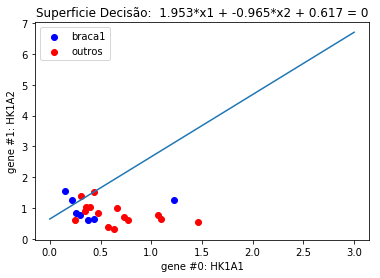

In [55]:
#criar relatorio de gráfica com os pontos e a reta de coef otimizados
import matplotlib.pyplot as plt
%matplotlib inline

def relatorio(coef,sn,genea,geneb):
    plt.xlabel("gene #"+str(genea)+": "+dataset[genea+1][0])
    plt.ylabel("gene #"+str(geneb)+": "+dataset[geneb+1][0])
    plt.title("Superficie Decisão:  "+str(round(coef[1],3))+"*x1 + "+str(round(coef[2],3))+"*x2 + "+str(round(coef[0],3))+" = 0")
    x=[]
    y=[]
    r=gerar_reta(coef,sn)
    x=braca1_outros(genea)
    y=braca1_outros(geneb)
    a1=plt.scatter(x[0],y[0],c='b')
    a2=plt.scatter(x[1],y[1],c='r')
    plt.legend((a1,a2),("braca1","outros"))
    plt.plot(r[0],r[1])

#exemplo: gerar a gráfica para os genes 0 e 1
relatorio(coefx,snx,0,1)

15) Obter iterativamente o relatório dos 10 melhores pares de genes (ou seja os que geram os melhores valores na função ganho)

[[9, 58, -0.0701, [67.30875318810872, -212.4154980577518, 99.64315646486605]], [2, 9, -3.2046, [12.94267663070628, -2.9747638058364263, -10.500890422359731]], [9, 17, -3.4513, [3.309113421116564, -12.35296782574711, 5.038304533071926]], [9, 79, -3.7165, [6.592235285477237, -18.809222412132183, 12.423074725027538]], [9, 38, -3.7249, [8.966913590674345, -7.892841199606351, -2.393706315532752]], [9, 77, -3.7429, [12.478268180169845, -11.451544301324851, -2.213658412017471]], [9, 61, -3.7593, [15.53282775553431, -14.565531896162126, -3.8602641686996217]], [1, 9, -3.7814, [15.234716468720812, -3.576264644861752, -15.17995366572589]], [9, 47, -3.9042, [3.8166663021868685, -12.184179318101991, 7.061299409477881]], [9, 48, -4.0901, [7.981195259926689, -18.379612497141093, 8.233348262053031]]]


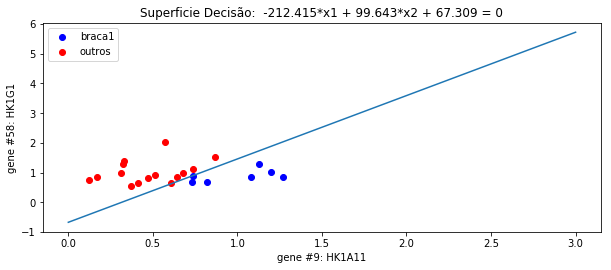

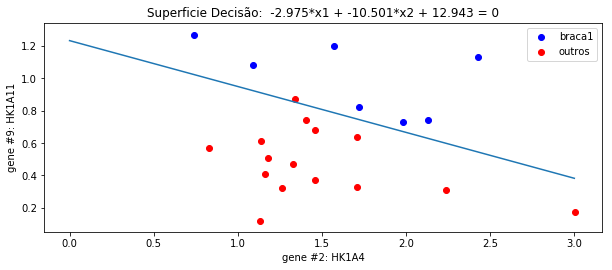

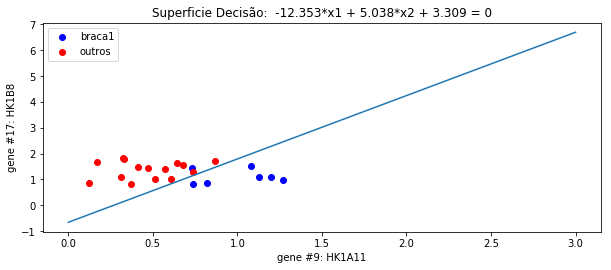

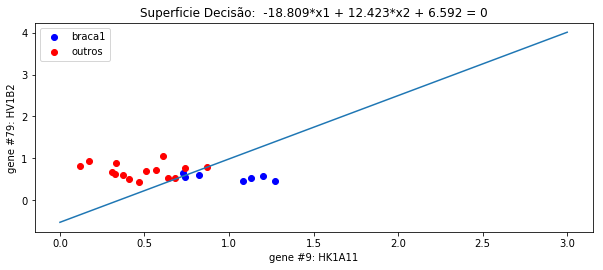

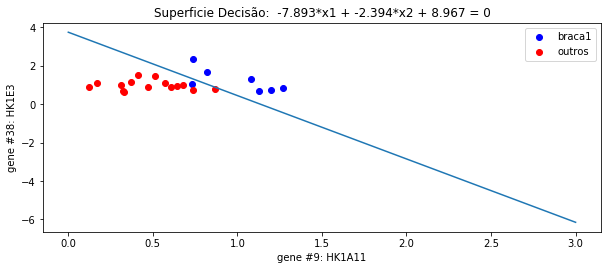

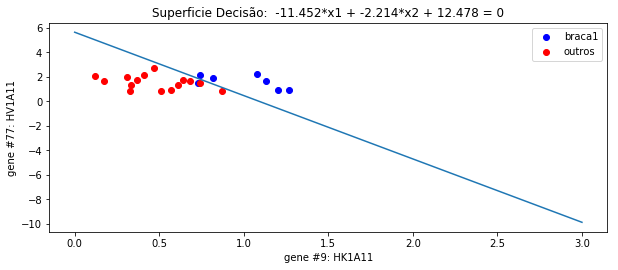

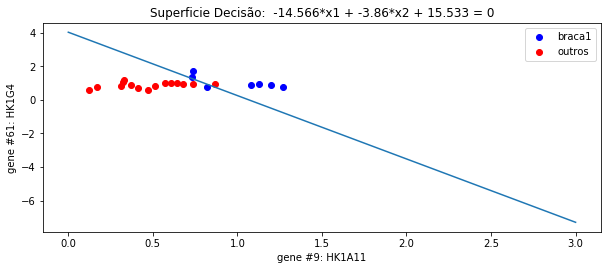

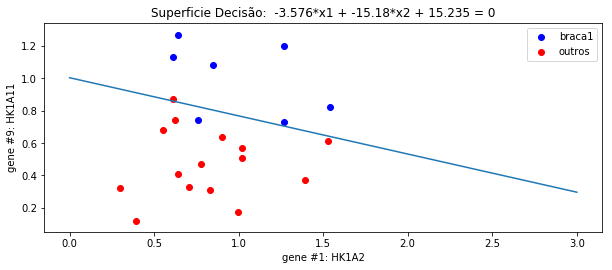

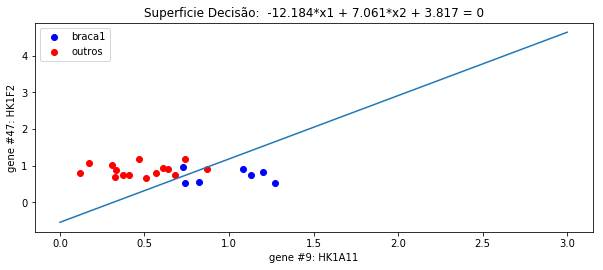

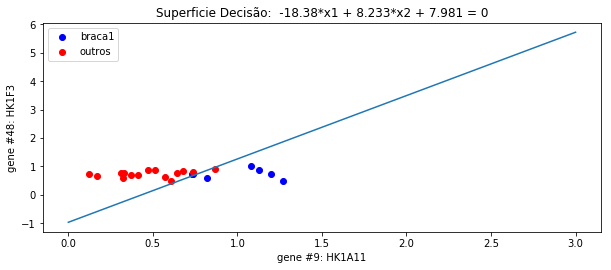

In [50]:
#gerar iterativamente os relatorios para o top10 dos valores de ganho
def relatorio_top10(best10):
    for i in range(1,11):
        plt.figure(i,figsize=(10,50))
        plt.subplot(11,1,i)
        relatorio(best10x[i-1][3],criar_sn(best10x[i-1][0],best10x[i-1][1]),best10x[i-1][0],best10x[i-1][1])

#imprimir relatorio dos 10 melhores
relatorio_top10(best10x)
print(best10x)